C:\Users\tlche\AppData\Local\Temp\ipykernel_19020\2909233269.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['has_any_alive'] = df[b5_columns].apply(lambda x: x.any(), axis=1).astype(int)
C:\Users\tlche\AppData\Local\Temp\ipykernel_19020\2909233269.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['num_alive_children'] = df[b5_columns].sum(axis=1)
C:\Users\tlche\AppData\Local\Temp\ipykernel_19020\2909233269.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

Top Correlations with 'has_any_alive':
 has_any_alive         1.000000
s1205                 0.973329
alive_ratio           0.962970
v220                  0.672344
v219                  0.622415
num_alive_children    0.621654
v218                  0.621654
v502                  0.617962
v201                  0.603842
v224                  0.603842
v535                  0.589213
v525                  0.571609
v513                  0.562247
v452a                 0.560079
v302a                 0.553889
Name: has_any_alive, dtype: float64


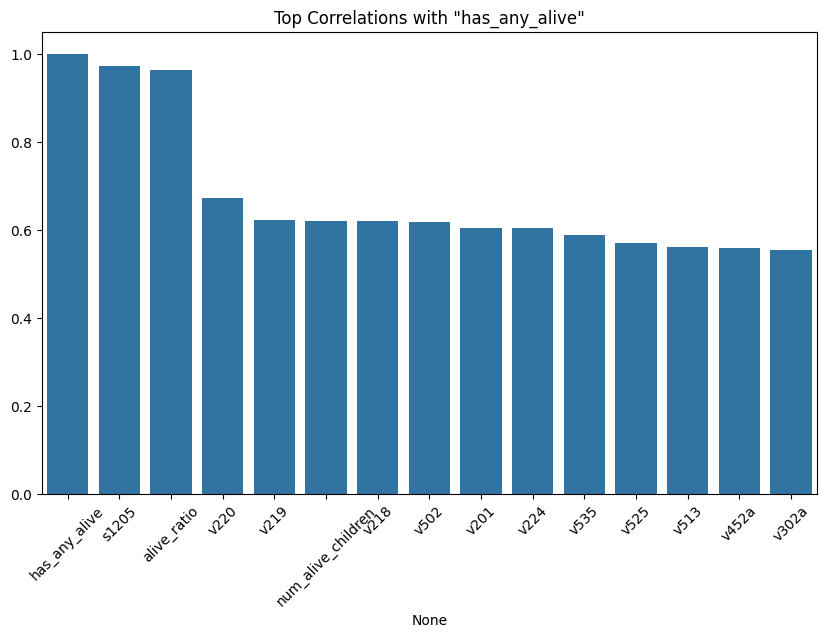


Logistic Regression Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
AUC: 1.0

Random Forest Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
AUC: 1.0


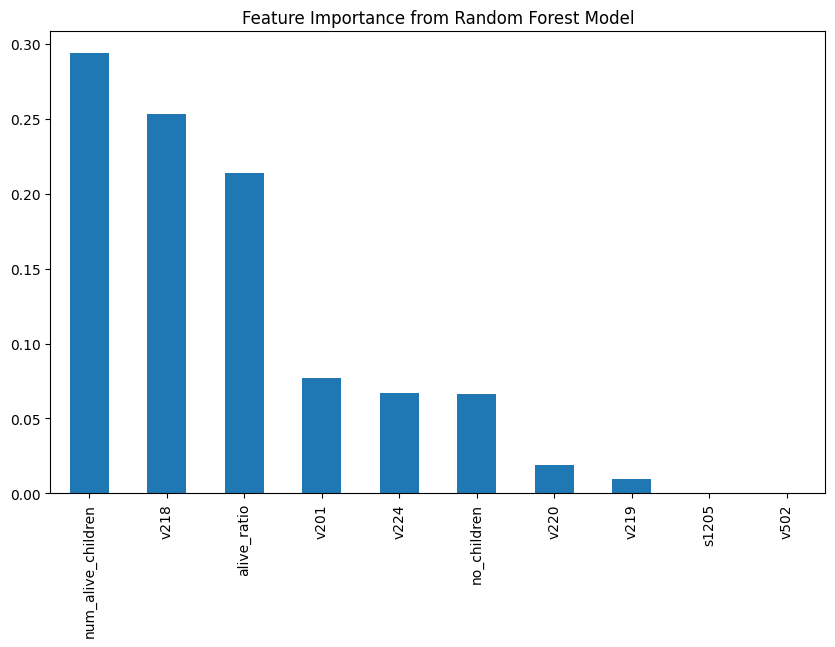

C:\Users\tlche\AppData\Local\Temp\ipykernel_19020\2909233269.py:96: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['alive_ratio'].fillna(0, inplace=True)


In [1]:
# Importing necessary libraries for data manipulation and model building
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_stata('C:/dhs data/datasets/ZMIR71DT/ZMIR71FL.DTA', convert_categoricals=False)

# Creating a target column 'has_any_alive' to indicate if any child is alive
b5_columns = [f'b5_{i:02d}' for i in range(1, 21)]
df['has_any_alive'] = df[b5_columns].apply(lambda x: x.any(), axis=1).astype(int)

# Creating new features 'num_alive_children' and 'alive_ratio'
df['num_alive_children'] = df[b5_columns].sum(axis=1)
total_children = df[b5_columns].notnull().sum(axis=1)
df['alive_ratio'] = df['num_alive_children'] / total_children
df['alive_ratio'].fillna(0, inplace=True)

# Creating a binary feature 'no_children' to indicate families with no children
df['no_children'] = (total_children == 0).astype(int)

# Selecting only numerical columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Correlation analysis with 'has_any_alive'
correlations = numeric_df.corr()['has_any_alive'].sort_values(ascending=False).head(15)
print("Top Correlations with 'has_any_alive':\n", correlations)

# Visualizing the top correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=45)
plt.title('Top Correlations with "has_any_alive"')
plt.show()

# Defining top features for the model, including new features and those identified through correlation
top_features = ['num_alive_children', 'alive_ratio', 'no_children', 's1205', 'v220', 'v219', 'v218', 'v502', 'v224', 'v201']

# Preparing data for model training
X = df[top_features]
y = df['has_any_alive']

# Handling missing values with a median imputer
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluating Logistic Regression model
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("AUC:", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluating Random Forest model
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

# Visualizing feature importance for Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=top_features)
plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance from Random Forest Model')
plt.show()

# The above models can be further fine-tuned with hyperparameter tuning or by adding new models for comparison.
# Creating a target column 'has_any_alive' to indicate if any child is alive (using only the first 6 columns)
b5_columns = [f'b5_{i:02d}' for i in range(1, 7)]  # Change 21 to 7 to include only the first 6 columns
df['has_any_alive'] = df[b5_columns].apply(lambda x: x.any(), axis=1).astype(int)

# Creating new features 'num_alive_children' and 'alive_ratio' based on the first 6 columns
df['num_alive_children'] = df[b5_columns].sum(axis=1)
total_children = df[b5_columns].notnull().sum(axis=1)
df['alive_ratio'] = df['num_alive_children'] / total_children
df['alive_ratio'].fillna(0, inplace=True)